Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset & Visualization

In [ ]:
job_data = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')

In [ ]:
#first 5 rows of the dataset
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#number of instances and columns
job_data.shape

(17880, 18)

In [ ]:
#Information of dataset
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
#we will be handling only the textual data, rest of the data field/column(Categorical,Numeric) will be removed
del job_data['job_id']
del job_data['title']
del job_data['location']
del job_data['department']
del job_data['salary_range']
del job_data['telecommuting']
del job_data['has_company_logo']
del job_data['has_questions']
del job_data['employment_type']
del job_data['required_experience']
del job_data['required_education']
del job_data['industry']
del job_data['function']

In [ ]:
#first 5 rows of the dataset
job_data.head()

,company_profile,description,requirements,benefits,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


fraudulent
0    17014
1      866
dtype: int64

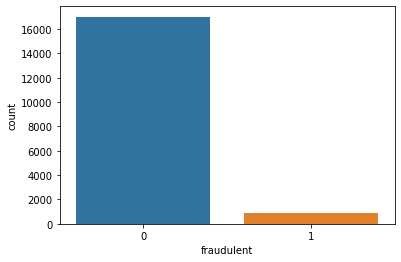

In [ ]:
#Count Plot of fraudulent job
sns.countplot(x='fraudulent', data=job_data)

job_data.value_counts('fraudulent')
# 0 - real job
# 1 - fake job

In [ ]:
#Checking for missing values
job_data.isnull().sum()

company_profile    3308
description           1
requirements       2695
benefits           7210
fraudulent            0
dtype: int64

In [ ]:
#replacing missing values with null string as text
job_data=job_data.fillna('')

In [ ]:
#Checking for missing values
job_data.isnull().sum()

company_profile    0
description        0
requirements       0
benefits           0
fraudulent         0
dtype: int64

In [ ]:
#Check if any duplicate rows in dataset
job_data.duplicated().sum()

2406

In [ ]:
#drop the duplicate values
job_data.drop_duplicates(inplace=True)

In [ ]:
job_data.duplicated().sum()

0

In [ ]:
job_data['content']=job_data['company_profile']+' '+job_data['description']+' '+job_data['requirements']+' '+job_data['benefits']

In [ ]:
job_data.head()

,company_profile,description,requirements,benefits,fraudulent,content
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,"We're Food52, and we've created a groundbreaki..."
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,"90 Seconds, the worlds Cloud Video Production ..."
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,Valor Services provides Workforce Solutions th...
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Our passion for improving quality of life thro...
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,SpotSource Solutions LLC is a Global Human Cap...


In [ ]:
job_data.drop(['company_profile','description','requirements','benefits'],axis=1,inplace=True)

In [ ]:
job_data.tail()

,fraudulent,content
17873,0,RESPONSIBILITIES:Will facilitate the recruiti...
17875,0,Vend is looking for some awesome new talent to...
17876,0,WebLinc is the e-commerce platform and service...
17877,0,We Provide Full Time Permanent Positions for m...
17878,0,Nemsia Studios is looking for an experienced ...


In [ ]:
fraud = job_data[job_data['fraudulent']== 1]
not_fraud = job_data[job_data['fraudulent']== 0]

In [ ]:
fraud.shape, not_fraud.shape

((684, 2), (14790, 2))

In [ ]:
job_data.rename({'fraudulent':'label'},axis=1, inplace=True)

In [ ]:
job_data.head()

,label,content
0,0,"We're Food52, and we've created a groundbreaki..."
1,0,"90 Seconds, the worlds Cloud Video Production ..."
2,0,Valor Services provides Workforce Solutions th...
3,0,Our passion for improving quality of life thro...
4,0,SpotSource Solutions LLC is a Global Human Cap...


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



Text Analysis

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [ ]:
#downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
fraudjobs_text = job_data[job_data.label==1].content
realjobs_text = job_data[job_data.label==0].content

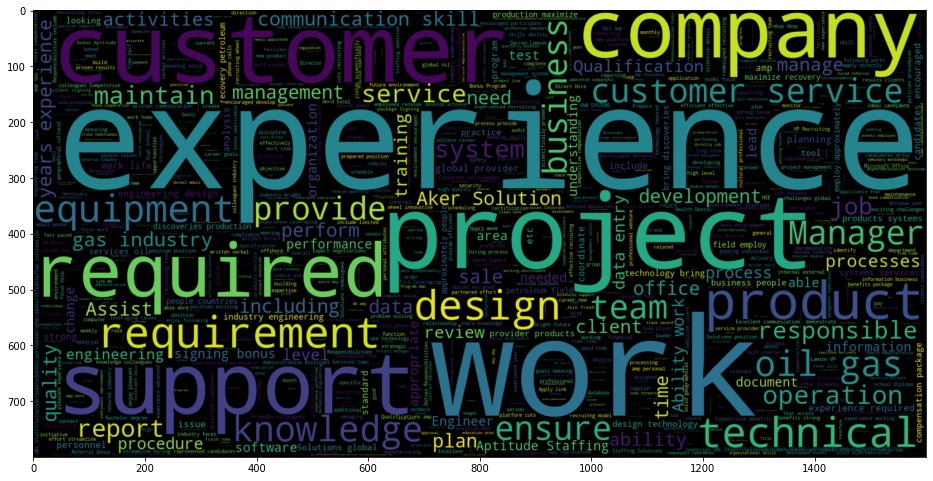

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc, interpolation = 'bilinear')

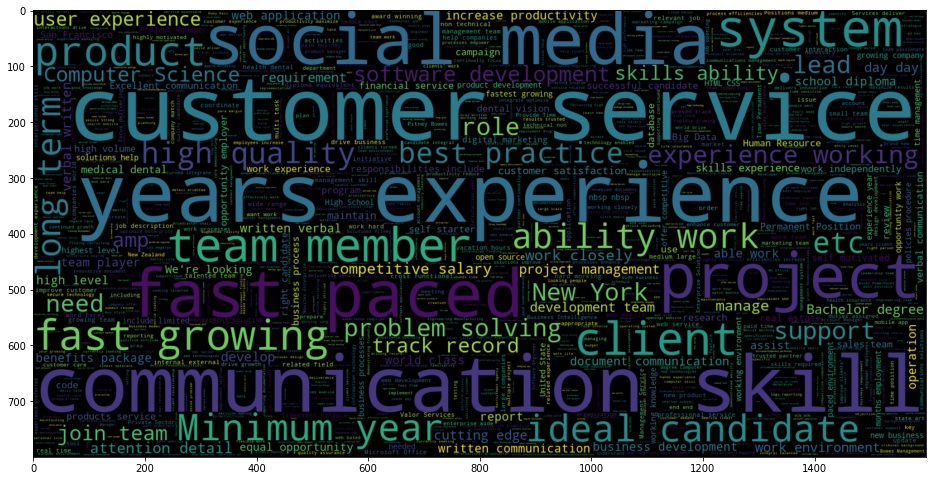

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
#seperating feature and target
X=job_data.drop(columns='label',axis=1)
Y=job_data['label']

In [ ]:
print(X)

                                                 content
0      We're Food52, and we've created a groundbreaki...
1      90 Seconds, the worlds Cloud Video Production ...
2      Valor Services provides Workforce Solutions th...
3      Our passion for improving quality of life thro...
4      SpotSource Solutions LLC is a Global Human Cap...
...                                                  ...
17873   RESPONSIBILITIES:Will facilitate the recruiti...
17875  Vend is looking for some awesome new talent to...
17876  WebLinc is the e-commerce platform and service...
17877  We Provide Full Time Permanent Positions for m...
17878   Nemsia Studios is looking for an experienced ...

[15474 rows x 1 columns]


In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
17873    0
17875    0
17876    0
17877    0
17878    0
Name: label, Length: 15474, dtype: int64


Stemming- reducing the words to its root word

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [ ]:
job_data['content']=job_data['content'].apply(stemming)

In [ ]:
print(job_data['content'])

0        food creat groundbreak award win cook site sup...
1        second world cloud video product servic second...
2        valor servic provid workforc solut meet need c...
3        passion improv qualiti life geographi heart ev...
4        spotsourc solut llc global human capit manag c...
                               ...                        
17873    respons facilit recruit hire process provid te...
17875    vend look awesom new talent come join us work ...
17876    weblinc e commerc platform servic provid faste...
17877    provid full time perman posit mani medium larg...
17878    nemsia studio look experienc visual graphic de...
Name: content, Length: 15474, dtype: object


In [ ]:
job_data.head()

,label,content
0,0,food creat groundbreak award win cook site sup...
1,0,second world cloud video product servic second...
2,0,valor servic provid workforc solut meet need c...
3,0,passion improv qualiti life geographi heart ev...
4,0,spotsourc solut llc global human capit manag c...


In [ ]:
job_data.to_csv('/content/drive/MyDrive/fake_job_postings_cleaned.csv')

In [ ]:
X=job_data['content'].values
Y=job_data['label'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#converting the textual data to feature vectors
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [ ]:
#balancing dataset
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
#implementing oversampling for handling imbalanced

smt = SMOTETomek(random_state=42)
X_res,y_res=smt.fit_resample(X,Y)

In [ ]:
X_res.shape, y_res.shape

((29580, 81214), (29580,))

Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.2)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(23664, 81214) (23664,) (5916, 81214) (5916,)


**Modelling**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MulNB = MultinomialNB()

In [ ]:
MulNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
X_test_prediction = MulNB.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.9601081812035159


In [ ]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2970
           1       0.94      0.98      0.96      2946

    accuracy                           0.96      5916
   macro avg       0.96      0.96      0.96      5916
weighted avg       0.96      0.96      0.96      5916



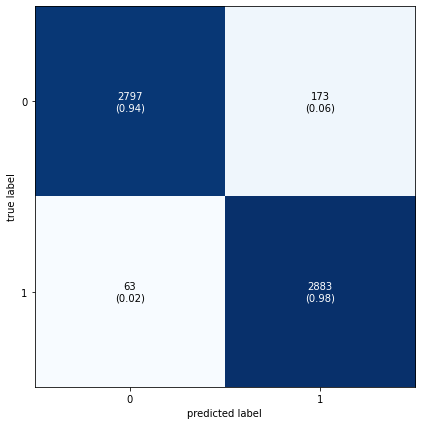

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
tree = tree.DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy score on test data
X_test_prediction = tree.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.9716024340770791


In [ ]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2960
           1       0.96      0.98      0.97      2956

    accuracy                           0.97      5916
   macro avg       0.97      0.97      0.97      5916
weighted avg       0.97      0.97      0.97      5916



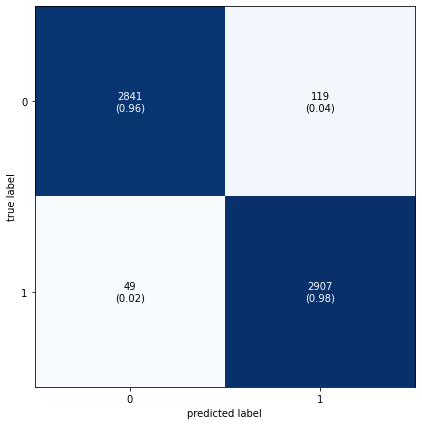

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
#accuracy score on test data
X_test_prediction = rfc.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.985632183908046


In [ ]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2960
           1       0.98      0.99      0.99      2956

    accuracy                           0.99      5916
   macro avg       0.99      0.99      0.99      5916
weighted avg       0.99      0.99      0.99      5916

Confusion Matrix

[[2898   62]
 [  23 2933]]


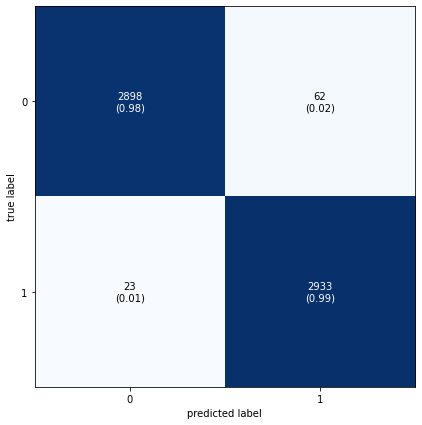

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

Support vector machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

svc.fit(X_train, Y_train)

SVC()

In [ ]:
#accuracy score on test data
X_test_prediction = svc.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.9984787018255578


In [ ]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2960
           1       1.00      1.00      1.00      2956

    accuracy                           1.00      5916
   macro avg       1.00      1.00      1.00      5916
weighted avg       1.00      1.00      1.00      5916



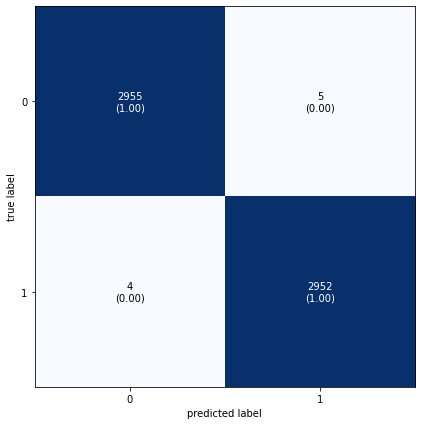

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [ ]:
lgr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#accuracy score on test data
X_test_prediction = lgr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.9827586206896551


In [ ]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2960
           1       0.97      1.00      0.98      2956

    accuracy                           0.98      5916
   macro avg       0.98      0.98      0.98      5916
weighted avg       0.98      0.98      0.98      5916



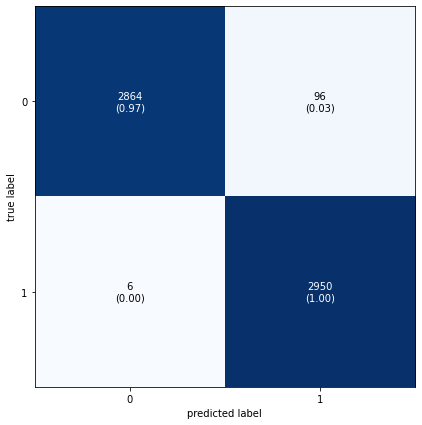

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

K_Nearest_Neighbour-KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
#accuracy score on test data
X_test_prediction = knn.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.7672413793103449


In [ ]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.53      0.70      2960
           1       0.68      1.00      0.81      2956

    accuracy                           0.77      5916
   macro avg       0.84      0.77      0.75      5916
weighted avg       0.84      0.77      0.75      5916

Confusion Matrix

[[1583 1377]
 [   0 2956]]


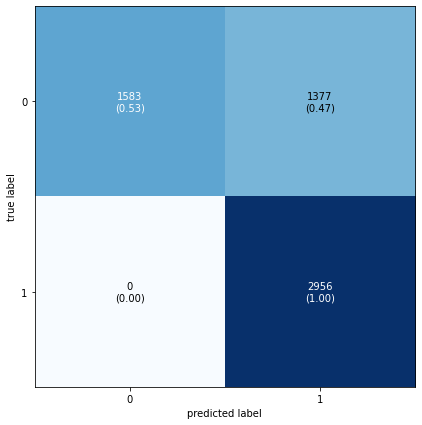

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);